In [11]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist         # библиотека базы выборок Mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten



In [12]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# стандартизация входных данных
x_train = x_train / 255
x_test = x_test / 255

y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)



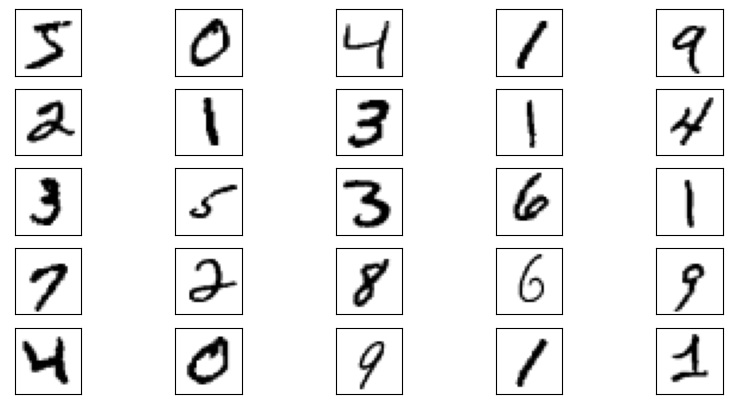

In [13]:
# отображение первых 25 изображений из обучающей выборки
plt.figure(figsize=(10,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)

plt.show()



In [14]:
model = keras.Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

print(model.summary())      # вывод структуры НС в консоль



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


In [15]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])


model.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_split=0.2)

model.evaluate(x_test, y_test_cat)




Epoch 1/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2920 - accuracy: 0.9180 - val_loss: 0.1588 - val_accuracy: 0.9557
Epoch 2/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.1335 - accuracy: 0.9599 - val_loss: 0.1335 - val_accuracy: 0.9620
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0910 - accuracy: 0.9724 - val_loss: 0.1133 - val_accuracy: 0.9669
Epoch 4/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0683 - accuracy: 0.9794 - val_loss: 0.0959 - val_accuracy: 0.9712
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0857 - accuracy: 0.9732


[0.08570664376020432, 0.9732000231742859]

1/1 [==============================] - 0s 68ms/step
[[6.4316495e-08 1.3538648e-08 5.7499187e-06 8.9825480e-05 9.9510244e-13
  9.1421583e-08 2.7337434e-13 9.9990308e-01 2.0010019e-07 8.7826800e-07]]
7


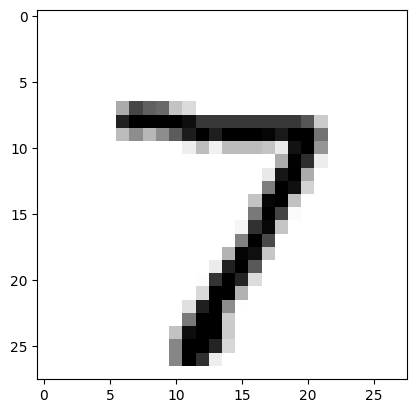

In [20]:
n = 0
x = np.expand_dims(x_test[n], axis=0)
res = model.predict(x)
print( res )
print( np.argmax(res) )

plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.show()


In [17]:
# Распознавание всей тестовой выборки
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)

print(pred.shape)

print(pred[:20])
print(y_test[:20])



313/313 [==============================] - 1s 2ms/step
(10000,)
[7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [25]:
# Выделение неверных вариантов
mask = pred == y_test
print(mask[:10])

x_false = x_test[~mask]
p_false = pred[~mask]

print(x_false.shape)



[ True  True  True  True  True  True  True  True False  True]
(268, 28, 28)


6 5 8 2 8 
7 3 7 9 8 
2 2 2 8 8 
8 3 4 9 6 
8 9 9 8 9 


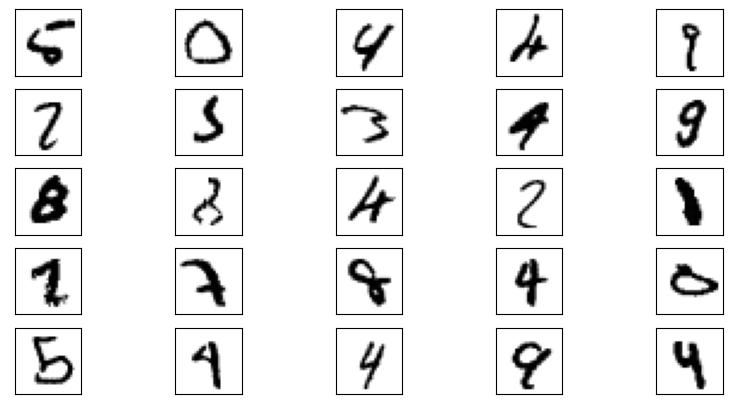

In [36]:
# Вывод первых 25 неверных результатов
plt.figure(figsize=(10,5))
for i in range(25):
    print(str(p_false[i]), end=" ")
    if (i + 1) % 5 == 0:  # После каждых 5 чисел перенос строки
        print()
        
for i in range(25):
    # print (" "+str(p_false[i]))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_false[i], cmap=plt.cm.binary)

plt.show()